In [111]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [112]:
# 폰트 설정
mpl.rc('font', family='Malgun Gothic')
# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

font1 = {'family': 'Malgun Gothic', 'size': 18, 
         'color':  'Green'}
font2 = {'family': 'Malgun Gothic', 'size': 18, 'weight': 'bold',
         'color':  'darkred'}
font3 = {'family': 'Malgun Gothic', 'size': 12, 'weight': 'light',
         'color':  'blue'}

# Iris

1. 붓꽃 species별로 평균, 표준편차 등 기초통계량 구하기

In [113]:
iris = sns.load_dataset('iris')
iris.head(7)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa


In [114]:
iris.groupby(iris.species).agg(["mean","std"])

sepal_length           sepal_width           petal_length  \
                   mean       std        mean       std         mean   
species                                                                
setosa            5.006  0.352490       3.428  0.379064        1.462   
versicolor        5.936  0.516171       2.770  0.313798        4.260   
virginica         6.588  0.635880       2.974  0.322497        5.552   

                     petal_width            
                 std        mean       std  
species                                     
setosa      0.173664       0.246  0.105386  
versicolor  0.469911       1.326  0.197753  
virginica   0.551895       2.026  0.274650

각 열에 대해 descibe()를 사용할 수 있지만 열마다 DF를 만들어야 하고 서로 비교하기 쉽지 않아 필요한 통계량만 가져올 수 있도록 agg(['함수','함수']) 사용

In [115]:
iris.groupby(iris.species).sepal_length.describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,50.0,5.006,0.352490,4.3,4.800,5.0,5.2,5.8
versicolor,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
virginica,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9


In [116]:
iris.head(7)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa


2. 3분위수(Q3)와 1분위수(Q1)의 차이보다 1.5배가 크거나 작은 데이터는 이상치이다. 이 이상치를 제거하고 각 열의 평균, 표준편차 구하기

In [117]:
iris.head()
# species 데이터는 문자열 데이터니까 IQR 할 수 없음. 인덱스로 뺌
iris.set_index('species', inplace=True)

In [118]:
# 인덱스를 얻는 함수
def get_outlier(df):
    q1 = np.percentile(df, 25) # q1 = df.quantile(.25) 
    q3 = np.percentile(df, 75) # q3 = df.quantile(.75)

    IQR_weight = (q3 - q1) * 1.5

    lowest, highest = q1 - IQR_weight, q3 + IQR_weight

    outlier_idx = np.where((df < lowest) | (df > highest))
    return outlier_idx

In [119]:
# apply를 쓰다보니 Index가 데이터프레임으로 나옴
index = iris.apply(get_outlier, axis=0)
index

,sepal_length,sepal_width,petal_length,petal_width
0,[],"[15, 32, 33, 60]",[],[]


In [120]:
# 인덱스로 drop하기 위해 원래 iris셋을 가져옴(원래는 인덱스가 정수로 되어있음)
iris = sns.load_dataset('iris')

get_outlier(iris.sepal_width)[0]
 

array([15, 32, 33, 60], dtype=int32)

In [121]:
# df.drop(df.index[[중첩리스트]])
iris = iris.drop(iris.index[get_outlier(iris.sepal_width)[0]])

In [122]:
iris.loc[14:16], iris.loc[31:34], iris.loc[59:61]

(    sepal_length  sepal_width  petal_length  petal_width species
 14           5.8          4.0           1.2          0.2  setosa
 16           5.4          3.9           1.3          0.4  setosa,
     sepal_length  sepal_width  petal_length  petal_width species
 31           5.4          3.4           1.5          0.4  setosa
 34           4.9          3.1           1.5          0.2  setosa,
     sepal_length  sepal_width  petal_length  petal_width     species
 59           5.2          2.7           3.9          1.4  versicolor
 61           5.9          3.0           4.2          1.5  versicolor)

In [123]:
iris.groupby(iris.species).agg(["mean","std"])

sepal_length           sepal_width           petal_length  \
                   mean       std        mean       std         mean   
species                                                                
setosa         4.976596  0.338932    3.376596  0.327183     1.461702   
versicolor     5.955102  0.503348    2.785714  0.296507     4.275510   
virginica      6.588000  0.635880    2.974000  0.322497     5.552000   

                     petal_width            
                 std        mean       std  
species                                     
setosa      0.178829    0.246809  0.103946  
versicolor  0.461668    1.332653  0.194066  
virginica   0.551895    2.026000  0.274650

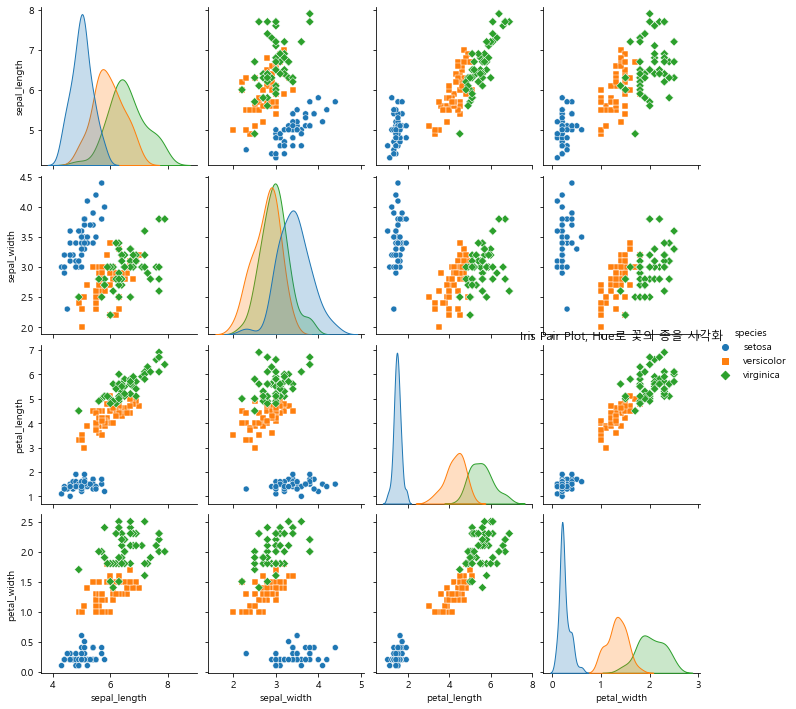

In [167]:
# 이상치 제거 이후
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])
plt.title("Iris Pair Plot, Hue로 꽃의 종을 시각화")
plt.show()

## NaN이 들어있는 행을 버리지 말고 새로운 평균/표준편차로 채우기    

In [125]:
iris = sns.load_dataset('iris')

In [126]:
def get_new_stat(Series):
    q1 = Series.quantile(.25)
    q3 = Series.quantile(.75)
    iqr = q3 - q1
    low_bound = q1 - 1.5 * iqr
    high_bound = q3 + 1.5 * iqr
    Series[ (Series<low_bound) | (Series>high_bound)] = np.nan
    outlier = ( Series.isnull().sum() != 50 )
    return outlier, Series.mean(), Series.std()


In [127]:
iris[iris.species == 'setosa'].sepal_length

0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
5     5.4
6     4.6
7     5.0
8     4.4
9     4.9
10    5.4
11    4.8
12    4.8
13    4.3
14    5.8
15    5.7
16    5.4
17    5.1
18    5.7
19    5.1
20    5.4
21    5.1
22    4.6
23    5.1
24    4.8
25    5.0
26    5.0
27    5.2
28    5.2
29    4.7
30    4.8
31    5.4
32    5.2
33    5.5
34    4.9
35    5.0
36    5.5
37    4.9
38    4.4
39    5.1
40    5.0
41    4.5
42    4.4
43    5.0
44    5.1
45    4.8
46    5.1
47    4.6
48    5.3
49    5.0
Name: sepal_length, dtype: float64

In [128]:
species = [] ; items =[] ; old_mean_list = [] ; old_std_list = []
for spec in ['setosa', 'versicolor', 'virginica']:
    for wl in ['sepal_length','sepal_width','petal_length','petal_width']:
        Series = iris[iris.species == spec][wl]
        species.append(spec) ; items.append(wl)
        old_mean_list.append(Series.mean()) ; old_std_list.append(Series.std())

In [129]:
tmp_iris = pd.DataFrame({
    'species' : species,
    'items' : items,
    'old_mean' : old_mean_list,
    'old_std' : old_std_list
})
new_iris = tmp_iris.set_index(['species','items'])
new_iris

old_mean   old_std
species    items                           
setosa     sepal_length     5.006  0.352490
           sepal_width      3.428  0.379064
           petal_length     1.462  0.173664
           petal_width      0.246  0.105386
versicolor sepal_length     5.936  0.516171
           sepal_width      2.770  0.313798
           petal_length     4.260  0.469911
           petal_width      1.326  0.197753
virginica  sepal_length     6.588  0.635880
           sepal_width      2.974  0.322497
           petal_length     5.552  0.551895
           petal_width      2.026  0.274650

In [130]:
outlier_list = [] ; mean_list =[] ; std_list  = [] 
for spec in ['setosa', 'versicolor', 'virginica']:
    for wl in ['sepal_length','sepal_width','petal_length','petal_width']:
        Series = iris[iris.species == spec][wl]
        outlier, new_mean, new_std = get_new_stat(Series)

        outlier_list.append(outlier) ; mean_list.append(new_mean) ; std_list.append(new_std)

In [131]:
new_iris['outlier'] = outlier_list
new_iris['new_mean'] = mean_list
new_iris['new_std'] = std_list
new_iris

old_mean   old_std  outlier  new_mean   new_std
species    items                                                        
setosa     sepal_length     5.006  0.352490     True  5.006000  0.352490
           sepal_width      3.428  0.379064     True  3.431250  0.320343
           petal_length     1.462  0.173664     True  1.460870  0.129062
           petal_width      0.246  0.105386     True  0.233333  0.085883
versicolor sepal_length     5.936  0.516171     True  5.936000  0.516171
           sepal_width      2.770  0.313798     True  2.770000  0.313798
           petal_length     4.260  0.469911     True  4.285714  0.437798
           petal_width      1.326  0.197753     True  1.326000  0.197753
virginica  sepal_length     6.588  0.635880     True  6.622449  0.593459
           sepal_width      2.974  0.322497     True  2.955319  0.260275
           petal_length     5.552  0.551895     True  5.552000  0.551895
           petal_width      2.026  0.274650     True  2.026000  0.274650

# Titanic

In [132]:
titanic = sns.load_dataset('titanic')
titanic.head(7)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True


In [133]:
# 여기 Count는 전체 Count. 밑에서 쓰일 female별, male별 에서는 사용할 수 없다. 집단을 굳이 나눴는데 그걸 다시 전체로 나누면 오류가 생기지
titanic.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [134]:
# NaN 제거
titanic.age = titanic.age.fillna(round(titanic.age.mean()))

1. 승객의 나이와 성별에 의한 카테고리 열인 category1 열을 만든다 <br>
\- 20살이 넘으면 성별을 그대로 사용한다.<br>
\- 20살 미만이면 성별에 관계없이 "Child" 라고 한다.

In [135]:
titanic['category1'] = titanic.apply(lambda r: "Child" if r.age <20 else r.age, axis=1)
titanic[['category1']]

,category1
0,22
1,38
2,26
3,35
4,35
...,...
886,27
887,Child
888,30
889,26


2. 타이타닉호의 승객 중 나이를 명시하지 않은 고객은 나이를 명시한 고객의 평균 나이 값이 되도록 titanic 데이터프레임을 고치세요.

In [136]:
# NaN 제거 => 1번에서 함
# titanic.age = titanic.age.fillna(round(titanic.age.mean()))
titanic.head(7)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,22
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,38
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,26
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,35
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,35
5,0,3,male,30.0,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,30
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,54


3. 성별, 선실(class)별, 출발지(embark_town)별 생존율

In [193]:
sex = titanic.pivot_table('survived','sex')
sex

,survived
sex,
female,0.742038
male,0.188908


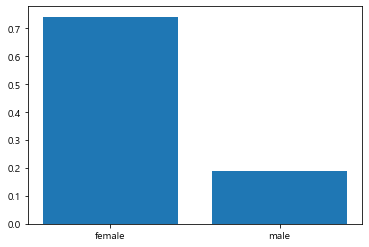

In [199]:
plt.bar(sex.index,sex.survived)
plt.show()

In [138]:
titanic.pivot_table('survived',['sex','class','embark_town'], margins=True)

survived
sex    class  embark_town          
female First  Cherbourg    0.976744
              Queenstown   1.000000
              Southampton  0.958333
       Second Cherbourg    1.000000
              Queenstown   1.000000
              Southampton  0.910448
       Third  Cherbourg    0.652174
              Queenstown   0.727273
              Southampton  0.375000
male   First  Cherbourg    0.404762
              Queenstown   0.000000
              Southampton  0.354430
       Second Cherbourg    0.200000
              Queenstown   0.000000
              Southampton  0.154639
       Third  Cherbourg    0.232558
              Queenstown   0.076923
              Southampton  0.128302
All                        0.382452

위처럼 쓴게 무슨 뜻이냐 br>
pivot_table의 데이터에 survived를 넣었는데, survived 데이터는 살면 1, 죽으면 0으로 표기해서 범주형 데이터처럼 넣었다. <br>

그런데 <br>
df.pivot_table('데이터','행','열', aggfunc='mean', margins=False...) <br>
여기서 aggfunc의 기본값은 mean임을 알 수 있다.<br>

그니까 저 위에 있는건 평균인 것이다. <br>
다시 말해 female이 600, male이 200이고
female의 1은 400, 0이 200 male이 150, 50 이라면
female의 값은 400/600, male은 150/200... <br>
female'별', male'별'로 쓰려면 이렇게 하는 게 맞는듯

In [139]:
# pivot_table에 쓸만할 파라미터 2개밖에 없으면 None으로 조절 가능
sex = titanic.pivot_table('survived', 'sex', None, aggfunc="count")

# 내가 틀렸네. 나는 female, male 별로 나누는 게 아니라 전체로 나눠버렸잖아.
# 제대로하려면 그냥 titnaic.pivot_table('survived','sex', aggfunc='mean')으로 하면 됨. aggfunc의 기본값이 mean이니까 안 써도 되고.

sex['ratio(%)'] = round(sex['survived'] / titanic.survived.count() * 100,2)
sex

,survived,ratio(%)
sex,,
female,314,35.24
male,577,64.76


In [140]:
titanic.pivot_table('survived','sex', aggfunc=['count','mean'])

,count,mean
,survived,survived
sex,,
female,314,0.742038
male,577,0.188908


In [141]:
class_ = titanic.pivot_table('survived', 'class', None, aggfunc="count")
class_['ratio(%)'] = round(class_['survived'] / titanic.survived.count() * 100,2)
class_

,survived,ratio(%)
class,,
First,216,24.24
Second,184,20.65
Third,491,55.11


In [142]:
titanic.pivot_table('survived', ['sex','class'], None, aggfunc=['count','mean'])

count      mean
              survived  survived
sex    class                    
female First        94  0.968085
       Second       76  0.921053
       Third       144  0.500000
male   First       122  0.368852
       Second      108  0.157407
       Third       347  0.135447

In [143]:
# 도수를 구해주는 crosstable
pd.crosstab([titanic.sex,titanic.survived], titanic['class'])

class            First  Second  Third
sex    survived                      
female 0             3       6     72
       1            91      70     72
male   0            77      91    300
       1            45      17     47

In [144]:
embark_town = titanic.pivot_table('survived', 'embark_town', None, aggfunc="count")
embark_town['ratio(%)'] = round(embark_town['survived'] / titanic.survived.count() * 100,2)
embark_town


,survived,ratio(%)
embark_town,,
Cherbourg,168,18.86
Queenstown,77,8.64
Southampton,644,72.28


In [145]:
titanic.pivot_table('survived', 'embark_town', None, aggfunc=['count','mean'])

,count,mean
,survived,survived
embark_town,,
Cherbourg,168,0.553571
Queenstown,77,0.389610
Southampton,644,0.336957


4. 타이타닉호 승객을 미성년자, 청년, 중년, 장년, 노년 나이 그룹으로 나누고 각 그룹별 생존률을 구하시오.

In [146]:
bins = [1, 20, 30, 50, 70, 100]
labels = ['미성년자', '청년', '중년', '장년', '노년']
cats = pd.cut(titanic.age, bins, labels=labels)
type(cats)

pandas.core.series.Series

In [147]:
titanic['나이그룹'] = cats

In [148]:
나이그룹 = titanic.pivot_table('survived','나이그룹',None, aggfunc='mean')
# 나이그룹['ratio(%)'] = round(나이그룹['survived'] / titanic.survived.count() * 100,2). 3번과 같은 이유로 틀림
나이그룹


,survived
나이그룹,
미성년자,0.424242
청년,0.334152
중년,0.423237
장년,0.355932
노년,0.200000


5. qcut 명령으로 3개의 나이 그룹을 만들고, 나이 그룹별 남녀 성비와 생존율을 구하시오.

In [149]:
qcat = pd.qcut(titanic.age, 3, labels=['1/3','2/3','3/3'])
titanic['Q나이그룹'] = qcat

In [150]:
Q나이그룹 = titanic.pivot_table('survived','Q나이그룹',None, aggfunc='mean')
# Q나이그룹['ratio(%)'] = round(Q나이그룹['survived'] / titanic.survived.count() * 100,2), 3번과 같은 이유로 틀림
Q나이그룹

,survived
Q나이그룹,
1/3,0.411960
2/3,0.335526
3/3,0.405594


# Mile Per Gallon

In [151]:
mpg = sns.load_dataset('mpg')
mpg.head(7)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala


In [152]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


1. 배기량(displacement) 대비 마력(horsepower) 열(hp_per_cc) 추가

In [153]:
mpg['hp_per_cc'] = mpg.displacement / mpg.horsepower
mpg.head(7)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,hp_per_cc
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,2.361538
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,2.121212
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,2.120000
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,2.026667
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,2.157143
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500,2.166667
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala,2.063636


2. name으로부터 manufacturer(제조사=> 첫번째 단어)와 모델을 추출하여 새로운 열 manufacturer와 model을 추가하고 name열은 삭제

In [154]:
type(mpg.name)

pandas.core.series.Series

In [155]:
mpg.name[0].split(' ')[0]

'chevrolet'

In [156]:
' '.join(mpg.name[0].split(' ')[1:])

'chevelle malibu'

In [157]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,hp_per_cc
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,2.361538
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,2.121212
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,2.120000
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,2.026667
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,2.157143


In [158]:
mpg['manufacturer'] = mpg.apply(lambda r: r['name'].split(' ')[0], axis=1)
mpg['manufacturer']

0      chevrolet
1          buick
2       plymouth
3            amc
4           ford
         ...    
393         ford
394           vw
395        dodge
396         ford
397        chevy
Name: manufacturer, Length: 398, dtype: object

In [159]:
mpg['model'] = mpg.apply(lambda r: " ".join( r['name'].split(' ')[1:]), axis=1)
mpg['model']

0      chevelle malibu
1          skylark 320
2            satellite
3            rebel sst
4               torino
            ...       
393         mustang gl
394             pickup
395            rampage
396             ranger
397               s-10
Name: model, Length: 398, dtype: object

In [160]:
del mpg['name']

In [161]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,hp_per_cc,manufacturer,model
0,18.0,8,307.0,130.0,3504,12.0,70,usa,2.361538,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,2.121212,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,2.120000,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,2.026667,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,2.157143,ford,torino


3. 엔진의 실린더(cylinders) 갯수별 연비(mpg)의 평균을 구하시오.

In [162]:
mpg.groupby('cylinders')[['mpg']].mean()

,mpg
cylinders,
3,20.550000
4,29.286765
5,27.366667
6,19.985714
8,14.963107


In [163]:
mpg.pivot_table('mpg','cylinders')

,mpg
cylinders,
3,20.550000
4,29.286765
5,27.366667
6,19.985714
8,14.963107


4. 생산지(origin)별 배기량 대비 마력(hp_per_cc)의 평균을 구하시오.

In [164]:
mpg.groupby('origin')[['hp_per_cc']].mean()

,hp_per_cc
origin,
europe,1.405597
japan,1.304120
usa,2.048289


5. 모델이 5개 이상인 제조사에 대하여 연비(mpg)의 평균이 가장 좋은 제조사 Top 5를 구하시오.


In [165]:
allman = mpg.groupby('manufacturer')[['model']].count()
allmanmpg = mpg.groupby('manufacturer')[['mpg']].mean()
# 가로(y축)로 합치는건 어디든 axis = 1, 세로(x축)은 axis=0
allman = pd.concat([allman, allmanmpg], axis=1)

top5 = allman[allman.model >= 5].sort_values(by="mpg", ascending=False)[:5]
top5

,model,mpg
manufacturer,,
vw,6,39.016667
honda,13,33.761538
renault,5,32.880000
datsun,23,31.113043
mazda,10,30.860000
